<a href="https://colab.research.google.com/github/jgardien/git-repo/blob/main/rophet_para_datos_Sodio_moderado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install prophet

In [ ]:
#!pip install plotly

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from google.colab import files

# Subir el archivo desde tu PC
uploaded = files.upload()
%matplotlib inline

Saving sodio_st_moderado_st.csv to sodio_st_moderado_st.csv


In [ ]:
data = pd.read_csv("sodio_st_moderado_st.csv", sep=",")
print(data.shape)
data.head()

(243, 2)


,Fecha,Cantidad
0,2020-07-01,7
1,2020-07-02,7
2,2020-07-03,3
3,2020-07-04,5
4,2020-07-05,2


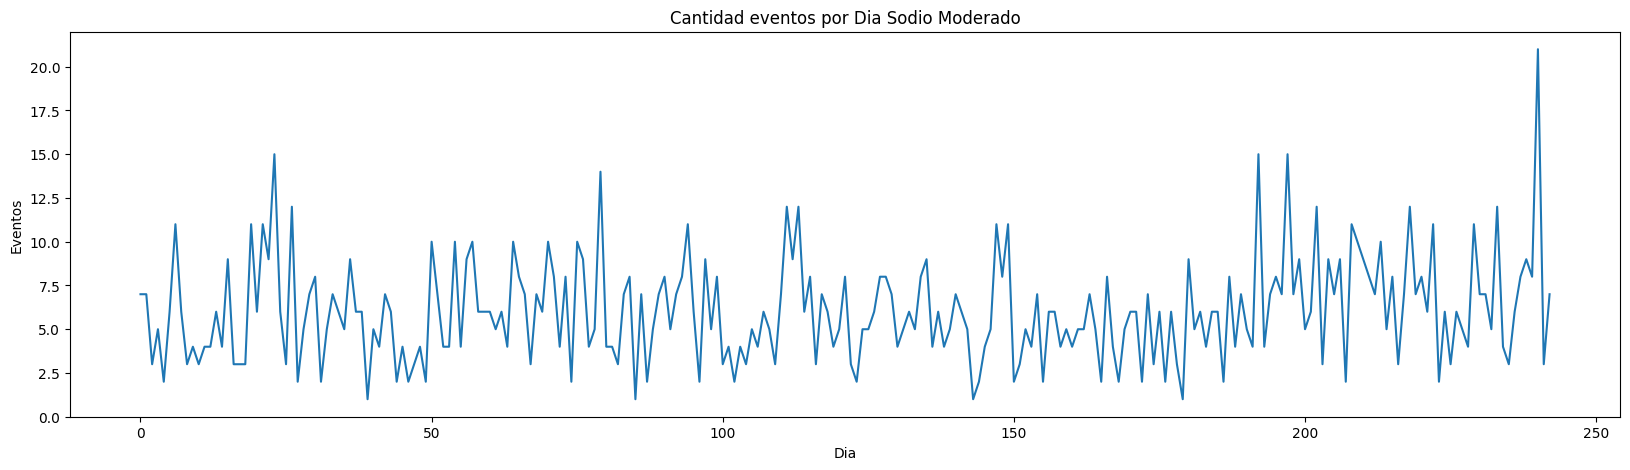

In [ ]:
plt.figure(figsize = [20,5])
plt.plot(data.Cantidad)
plt.title("Cantidad eventos por Dia Sodio Moderado")
plt.xlabel("Dia")
plt.ylabel("Eventos")
plt.show()

In [ ]:
train_percentage = 0.67
train_size = int(len(data)*train_percentage)

train = data[:train_size]
test = data[train_size:]
train = train.rename(columns={'Fecha': 'ds', 'Cantidad': 'y'}) #columns names: "ds" and "y" https://facebook.github.io/prophet/docs/quick_start.html#python-api
test = test.rename(columns={'Fecha': 'ds', 'Cantidad': 'y'})
print(train.shape)
train.head()

(162, 2)


,ds,y
0,2020-07-01,7
1,2020-07-02,7
2,2020-07-03,3
3,2020-07-04,5
4,2020-07-05,2


In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6_g_x0q/9fydoyf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6_g_x0q/qb37ayab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28319', 'data', 'file=/tmp/tmpd6_g_x0q/9fydoyf6.json', 'init=/tmp/tmpd6_g_x0q/qb37ayab.json', 'output', 'file=/tmp/tmpd6_g_x0q/prophet_model0hi0krxc/prophet_model-20240105165628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions = prophet_basic.make_future_dataframe(periods=test.shape[0]+1)
predictions.tail(2)

,ds
242,2021-02-28
243,2021-03-01


In [ ]:
predictions = prophet_basic.predict(predictions)
predictions.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2021-02-25,5.310055,3.421564,9.937476,5.305763,5.314466,1.245671,1.245671,1.245671,1.245671,1.245671,1.245671,0.0,0.0,0.0,6.555726
240,2021-02-26,5.307221,3.032747,9.312180,5.302841,5.311718,1.033627,1.033627,1.033627,1.033627,1.033627,1.033627,0.0,0.0,0.0,6.340848
241,2021-02-27,5.304387,1.303769,7.590265,5.299885,5.308986,-0.937825,-0.937825,-0.937825,-0.937825,-0.937825,-0.937825,0.0,0.0,0.0,4.366563
242,2021-02-28,5.301553,-0.223199,5.901025,5.296960,5.306256,-2.308527,-2.308527,-2.308527,-2.308527,-2.308527,-2.308527,0.0,0.0,0.0,2.993026
243,2021-03-01,5.298719,2.573882,8.846086,5.293998,5.303535,0.225812,0.225812,0.225812,0.225812,0.225812,0.225812,0.0,0.0,0.0,5.524532


In [ ]:
predictions[["ds", "yhat"]].dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [ ]:
test['ds'] = pd.to_datetime(test['ds'])
results = pd.merge(test, predictions[["ds", "yhat"]], on = ["ds"], how='left')

In [ ]:
results.tail()

,ds,y,yhat
76,2021-02-24,9,5.825823
77,2021-02-25,8,6.555726
78,2021-02-26,21,6.340848
79,2021-02-27,3,4.366563
80,2021-02-28,7,2.993026


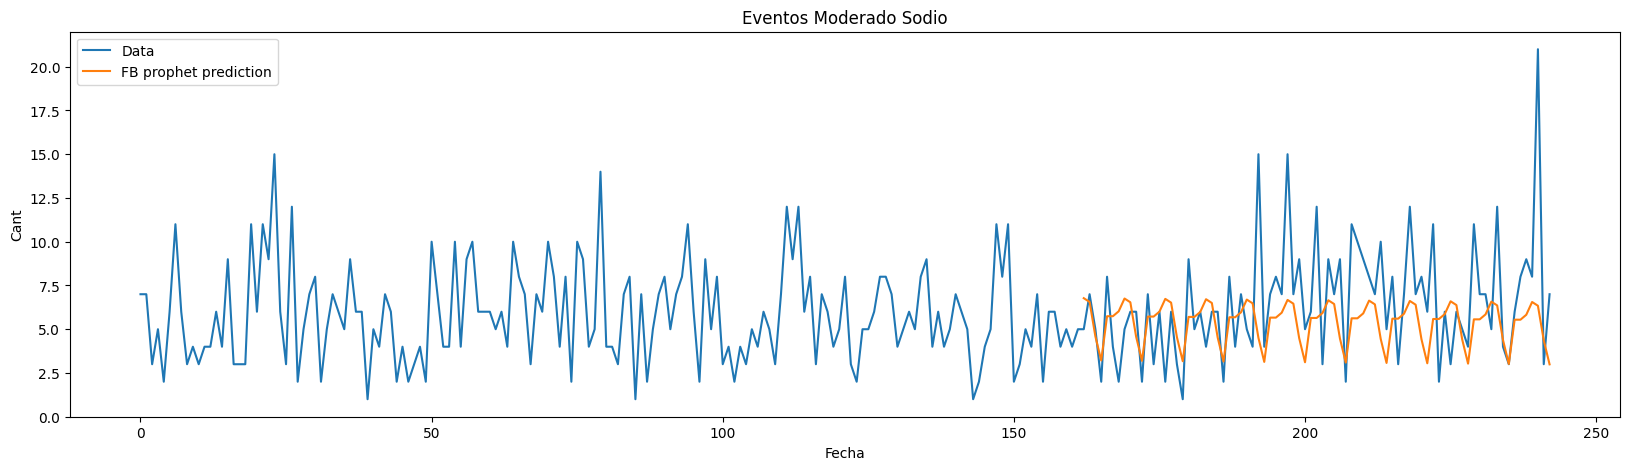

In [ ]:
index_start = len(train)
index_end = len(train) + len(test)
plt.figure(figsize = [20,5])
plt.plot(data.Cantidad, label="Data")
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction")
plt.title("Eventos Moderado Sodio")
plt.xlabel("Fecha")
plt.ylabel("Cant")
plt.legend()
plt.show()

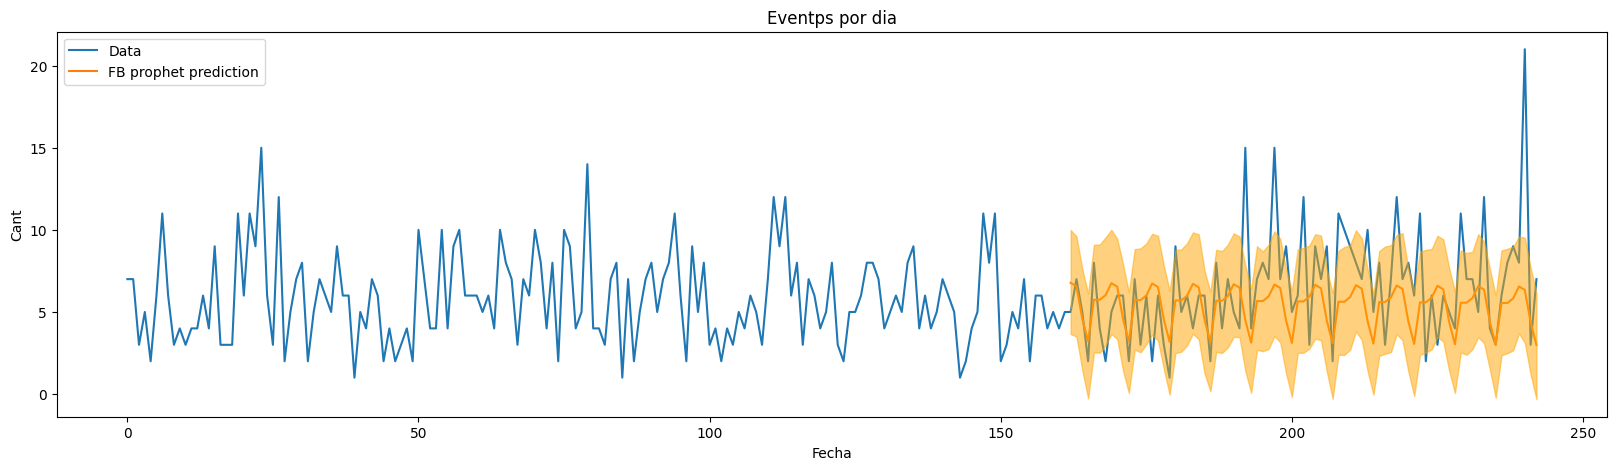

In [ ]:
plt.figure(figsize = [20,5])
plt.plot(data.Cantidad, label="Data", zorder = 1)
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction", zorder = 2)
plt.fill_between(range(len(train), len(train) + len(test)), predictions.yhat_lower.values[index_start:index_end], predictions.yhat_upper.values[index_start:index_end], alpha=0.5, color ="orange", zorder = 3)
plt.title("Eventps por dia")
plt.xlabel("Fecha")
plt.ylabel("Cant")
plt.legend()
plt.show()

In [ ]:
mean_squared_error(results.y, results.yhat)

11.596700443298037